# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = f"{url}APPID={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | la sarre
Processing Record 3 of Set 1 | blackmans bay
Processing Record 4 of Set 1 | beckley
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | north syracuse
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | nizhniy kuranakh
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | wailua homesteads
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | chonchi
Processing Record 18 of Set 1 | tobruk
Processing Record 19 of Set 1 | gadzhiyevo
Processing Record 20 of Set 1 | atafu village
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | waitang

Processing Record 37 of Set 4 | arraial do cabo
Processing Record 38 of Set 4 | freetown
Processing Record 39 of Set 4 | qaqortoq
Processing Record 40 of Set 4 | novodvinsk
Processing Record 41 of Set 4 | kuqa
Processing Record 42 of Set 4 | hamilton
Processing Record 43 of Set 4 | regina
Processing Record 44 of Set 4 | port saint john's
Processing Record 45 of Set 4 | huarmey
Processing Record 46 of Set 4 | vorkuta
Processing Record 47 of Set 4 | shenjiamen
Processing Record 48 of Set 4 | namibe
Processing Record 49 of Set 4 | labasa
Processing Record 0 of Set 5 | sittwe
Processing Record 1 of Set 5 | masterton
Processing Record 2 of Set 5 | valdivia
Processing Record 3 of Set 5 | nurota
Processing Record 4 of Set 5 | klyuchi
Processing Record 5 of Set 5 | aasiaat
Processing Record 6 of Set 5 | ponta delgada
Processing Record 7 of Set 5 | northam
Processing Record 8 of Set 5 | gao
Processing Record 9 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 10 of Set 5 | kefl

Processing Record 32 of Set 8 | el daein
City not found. Skipping...
Processing Record 33 of Set 8 | lichuan
Processing Record 34 of Set 8 | asau
Processing Record 35 of Set 8 | peterhead
Processing Record 36 of Set 8 | waitara
Processing Record 37 of Set 8 | damboa
Processing Record 38 of Set 8 | castillos
Processing Record 39 of Set 8 | kapit
Processing Record 40 of Set 8 | remire-montjoly
Processing Record 41 of Set 8 | salekhard
Processing Record 42 of Set 8 | rubtsovsk
Processing Record 43 of Set 8 | le vauclin
Processing Record 44 of Set 8 | la palma
Processing Record 45 of Set 8 | ramadi
Processing Record 46 of Set 8 | vila velha
Processing Record 47 of Set 8 | farah
Processing Record 48 of Set 8 | motueka
Processing Record 49 of Set 8 | ceeldheer
Processing Record 0 of Set 9 | colonel hill
Processing Record 1 of Set 9 | hampton bays
Processing Record 2 of Set 9 | grand falls-windsor
Processing Record 3 of Set 9 | kerema
Processing Record 4 of Set 9 | darnah
Processing Record 5 

Processing Record 20 of Set 12 | samdrup jongkhar
Processing Record 21 of Set 12 | mpulungu
Processing Record 22 of Set 12 | ahmadpur
Processing Record 23 of Set 12 | padam
City not found. Skipping...
Processing Record 24 of Set 12 | limon
Processing Record 25 of Set 12 | marrakesh
Processing Record 26 of Set 12 | homestead meadows north
Processing Record 27 of Set 12 | colchani
Processing Record 28 of Set 12 | talakan
Processing Record 29 of Set 12 | aktau
Processing Record 30 of Set 12 | skole
Processing Record 31 of Set 12 | fort mcmurray
Processing Record 32 of Set 12 | nuuk
Processing Record 33 of Set 12 | constitucion
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,29.98,85,52,4.02,EC,1698605337
1,la sarre,48.8002,-79.1996,1.82,85,100,3.41,CA,1698605453
2,blackmans bay,-43.0167,147.3167,13.07,61,100,1.34,AU,1698605316
3,beckley,37.7782,-81.1882,23.73,69,100,4.12,US,1698605453
4,adamstown,-25.0660,-130.1015,22.23,85,100,7.09,PN,1698605314


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,85,52,4.02,EC,1698605337
1,la sarre,48.8002,-79.1996,1.82,85,100,3.41,CA,1698605453
2,blackmans bay,-43.0167,147.3167,13.07,61,100,1.34,AU,1698605316
3,beckley,37.7782,-81.1882,23.73,69,100,4.12,US,1698605453
4,adamstown,-25.0660,-130.1015,22.23,85,100,7.09,PN,1698605314


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

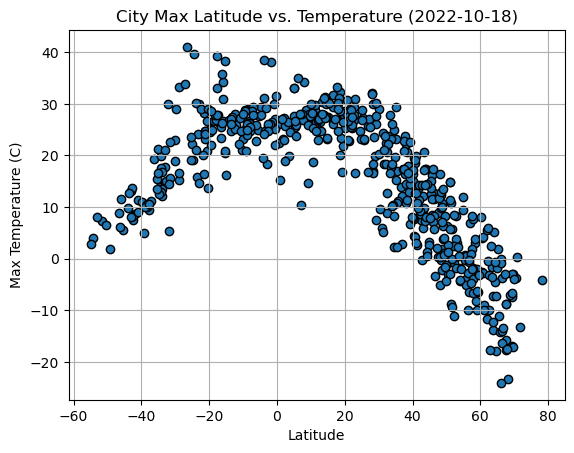

In [12]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis,y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

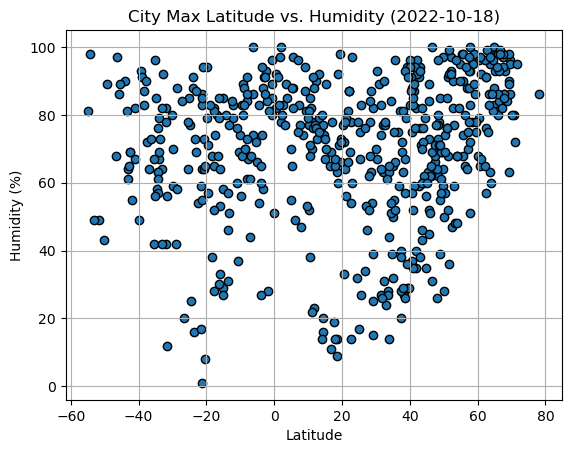

In [13]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis,y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

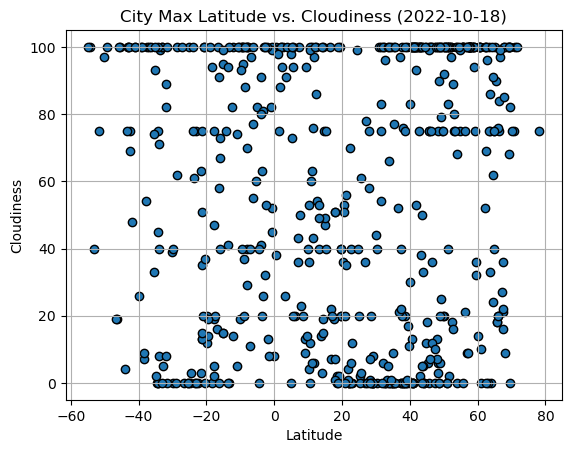

In [14]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis,y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

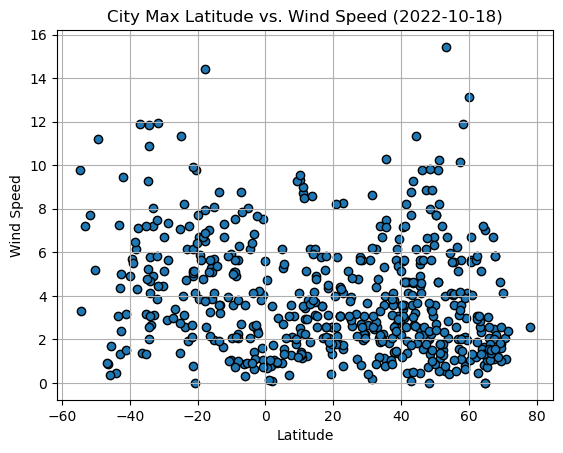

In [15]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis,y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,la sarre,48.8002,-79.1996,1.82,85,100,3.41,CA,1698605453
3,beckley,37.7782,-81.1882,23.73,69,100,4.12,US,1698605453
7,north syracuse,43.1348,-76.1299,8.62,94,100,3.60,US,1698605453
8,college,64.8569,-147.8028,-1.72,83,75,0.00,US,1698605331
10,nizhniy kuranakh,58.8353,125.4869,-8.23,98,100,0.79,RU,1698605454


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.98,85,52,4.02,EC,1698605337
2,blackmans bay,-43.0167,147.3167,13.07,61,100,1.34,AU,1698605316
4,adamstown,-25.0660,-130.1015,22.23,85,100,7.09,PN,1698605314
5,uturoa,-16.7333,-151.4333,26.02,80,16,7.03,PF,1698605333
6,west island,-12.1568,96.8225,25.99,83,100,6.69,CC,1698605103


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7665360091053837


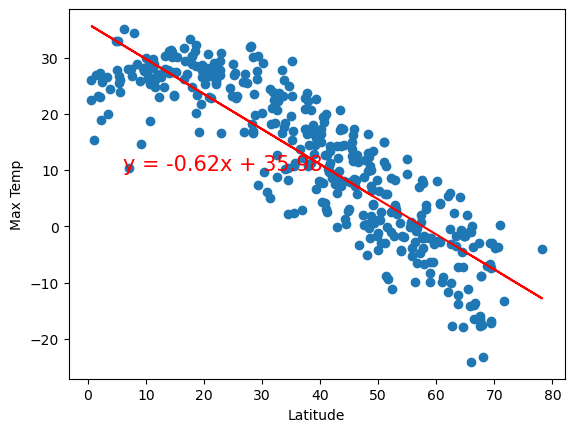

In [20]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
plt.scatter(x_axis,y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(False)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.5653738438919763


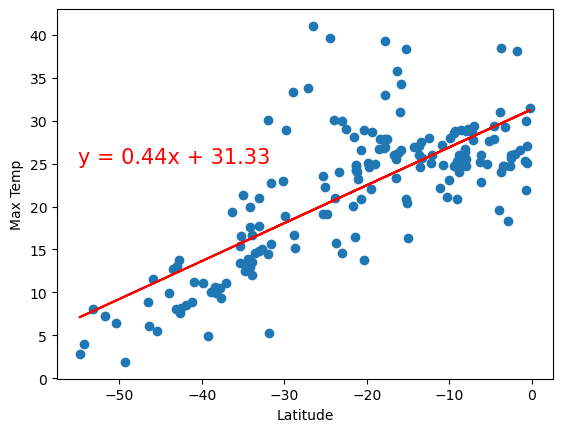

In [22]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]
plt.scatter(x_axis,y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.grid(False)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a negative correlation between latitude and temperature: the higher the latitude, the colder the temperature. The Southern Hemisphere has a positive correlation between latitude and temperature: the higher the latitude, the warmer the temperature. It also appears to be warmest at the equator where latitude = 0.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.058280673669765595


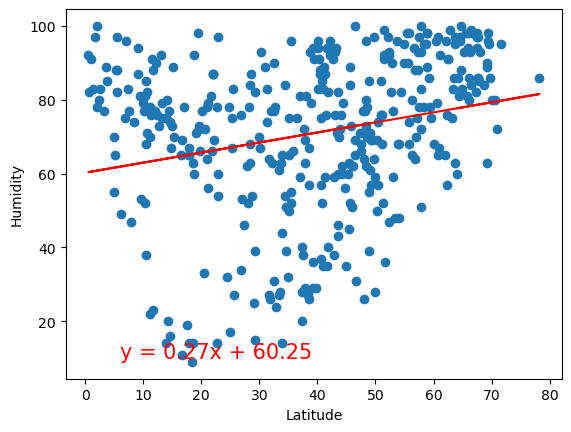

In [23]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
plt.scatter(x_axis,y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(False)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.00030293258331882337


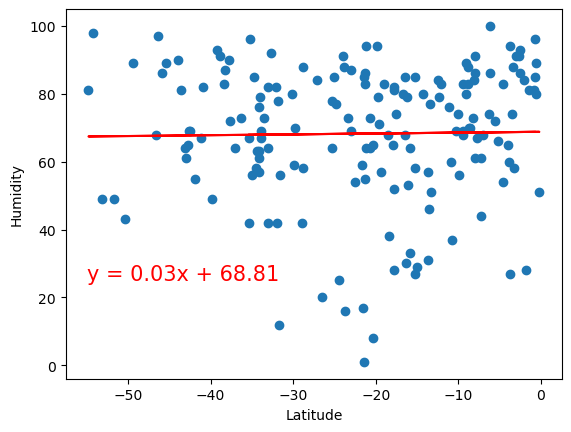

In [24]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
plt.scatter(x_axis,y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(False)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a slightly positive correlation, however, it is very scattered/mostly no correlation. The Southern Hemisphere has a less slightly positive correltion and appears to have mostly no correlation.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.04154968152344478


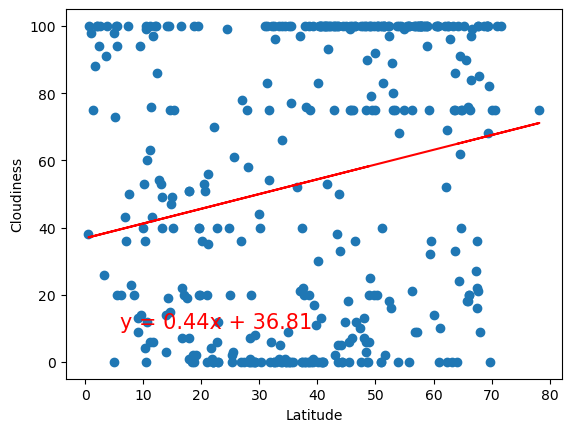

In [25]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]
plt.scatter(x_axis,y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(False)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.0016561162931759807


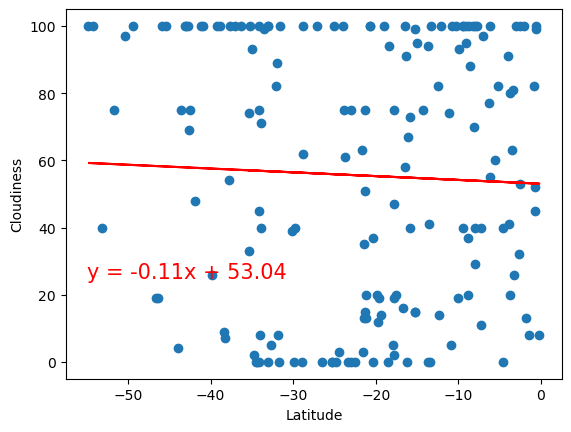

In [26]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]
plt.scatter(x_axis,y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(False)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a positive correlation, however, it is very scattered/mostly no correlation. The Southern Hemisphere has a slightly negative correltion and appears to have mostly no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 1.66055498420259e-06


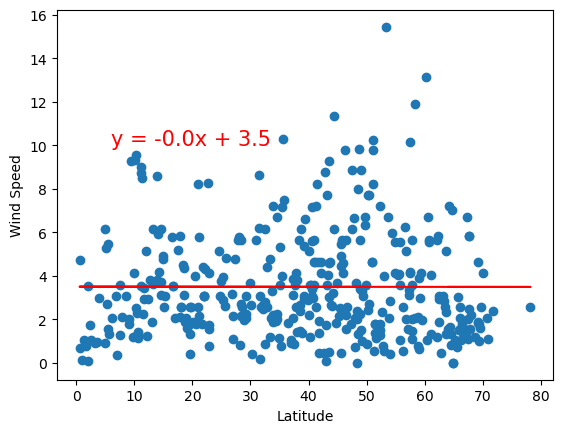

In [27]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]
plt.scatter(x_axis,y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(False)

print(f"The r-value is: {rvalue**2}")

plt.show()

The r-value is: 0.029222442534580447


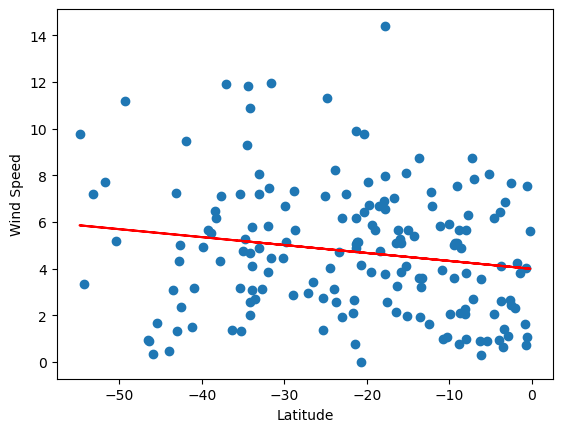

In [28]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]
plt.scatter(x_axis,y_axis, marker="o")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(False)

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** The Northern Hemisphere has a very slightly positive correlation, however it has mostly no correlation. The Southern Hemisphere has a slightly negative correltion.